In [103]:
# Import all the relevant libraries 
import pandas as pd 
import numpy as no 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

%matplotlib inline

In [104]:
train = pd.read_csv("datasets/train.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [105]:
train.columns=map(str.lower, train.columns)
train.columns = train.columns.str.strip().str.replace(" ","_")
for col in train.columns:
#     if col is object
    if train[col].dtypes == object:
        train[col].fillna('NA', inplace=True)
#     elif col is float or int
    if train[col].dtypes == int or train[col].dtypes == float:
        train[col].fillna(0, inplace=True)

train.isnull().sum().sort_values(ascending=False)

saleprice          0
total_bsmt_sf      0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
year_built         0
overall_cond       0
overall_qual       0
lot_shape          0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
land_contour       0
house_style        0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
bsmt_unf_sf        0
heating            0
sale_type          0
heating_qc         0
garage_cars        0
garage_area        0
garage_qual        0
garage_cond        0
paved_drive  

In [106]:
train['garage_area'] = train[["garage_area"]].fillna(value = 474)

In [107]:
street_cleaned = { "Grvl" : 0,
                   "Pave" : 1}
train["street"] = train[["street"]].replace(street_cleaned)

In [108]:
ms_ven_type_cld = {
                   "None" : 0, 
                   "BrkCmn": 1, 
                   "BrkFace": 2, 
                   "Stone": 3 }
train["mas_vnr_type"] = train[["mas_vnr_type"]].replace(ms_ven_type_cld)

In [109]:
train['mas_vnr_area'] = train[["mas_vnr_area"]].fillna(value = 0)

In [110]:
na_to_ex_rating = {"NA" : 0,
                 "Po" : 1, 
                 "Fa" : 2,
                 "TA" : 3, 
                 "Gd" : 4, 
                 "Ex" : 5,}
train['bsmt_qual'] = train[['bsmt_qual']].replace(na_to_ex_rating)

In [111]:
train["bsmt_cond"] = train[['bsmt_cond']].replace(na_to_ex_rating)

In [112]:
land_contour_cleaned = { "Bnk" : 0, 
                          "Lvl" : 1, 
                          "Low" : 2, 
                          "HLS" : 3} 
train['land_contour'] = train[['land_contour']].replace(land_contour_cleaned)


In [113]:
heating_qc_cleaned = {
                 "Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
train['heating_qc'] = train[['heating_qc']].replace(heating_qc_cleaned)


In [114]:
kitchen_qc_cleaned = {"Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
train['kitchen_qual'] = train[['kitchen_qual']].replace(kitchen_qc_cleaned)

In [115]:
train['exter_qual'] = train[['exter_qual']].replace(kitchen_qc_cleaned)
train['exter_cond'] = train[['exter_cond']].replace(kitchen_qc_cleaned)

In [116]:
train = pd.get_dummies(train, columns = ['neighborhood'], drop_first=True)
train = pd.get_dummies(train, columns = ['central_air'], drop_first=True)
train = pd.get_dummies(train, columns = ['electrical'], drop_first = True)

In [117]:
train["garage_comb"] = train["garage_area"] * train["garage_cars"]

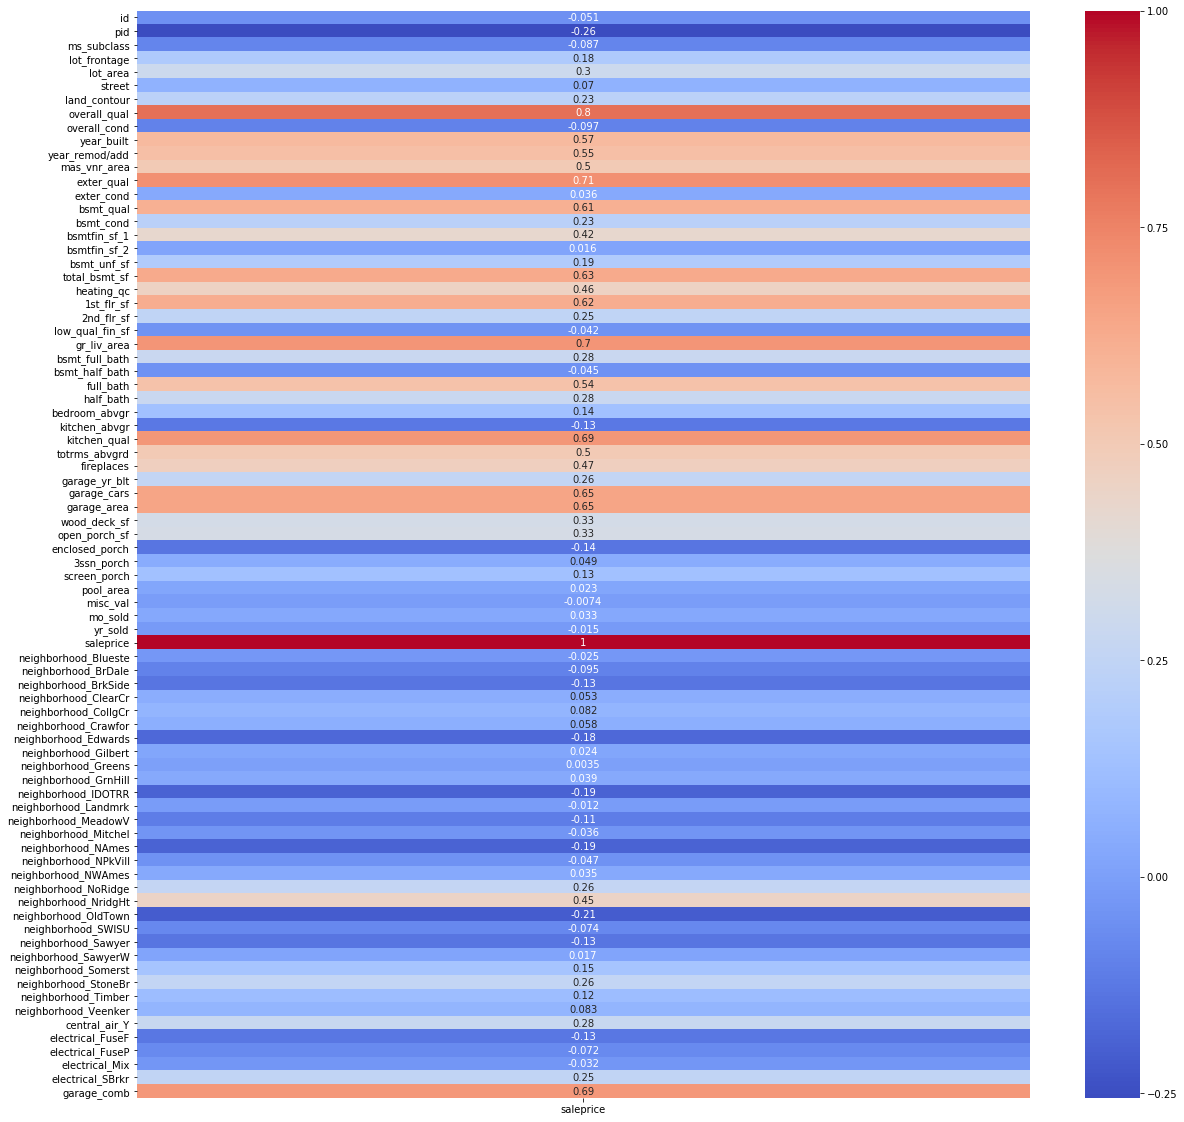

In [118]:
plt.figure(figsize = (20,20))
sns.heatmap(train.corr()[['saleprice']], annot = True, cmap = 'coolwarm');

In [119]:
dummy_cols = train.columns[-32:]

In [120]:
dummy_cols

Index(['neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
       'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
       'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill',
       'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill',
       'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
       'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
       'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr',
       'neighborhood_Timber', 'neighborhood_Veenker', 'central_air_Y',
       'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix',
       'electrical_SBrkr', 'garage_comb'],
      dtype='object')

In [121]:
features = ['neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
       'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker',
       'central_air_Y', 'overall_qual', 'year_built', '1st_flr_sf','mas_vnr_area',
       'garage_comb', ]
X = train[features]
y = train['saleprice']

In [122]:
train.dtypes

id                        int64
pid                       int64
ms_subclass               int64
ms_zoning                object
lot_frontage            float64
lot_area                  int64
street                    int64
alley                    object
lot_shape                object
land_contour              int64
utilities                object
lot_config               object
land_slope               object
condition_1              object
condition_2              object
bldg_type                object
house_style              object
overall_qual              int64
overall_cond              int64
year_built                int64
year_remod/add            int64
roof_style               object
roof_matl                object
exterior_1st             object
exterior_2nd             object
mas_vnr_type             object
mas_vnr_area            float64
exter_qual                int64
exter_cond                int64
foundation               object
bsmt_qual                 int64
bsmt_con

In [123]:
lr = LinearRegression()

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50)


In [125]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
lr.score(X_train,y_train)

0.8056852531536429

In [127]:
lr.score(X_test, y_test)

0.7881660811090975

In [128]:
cross_val_score(lr, X_train, y_train, cv = 10).mean()

0.7852941505085005

In [129]:
val_preds = pd.DataFrame(lr.predict(X_test), columns = ["val_preds"])
val_preds.head()

,val_preds
0,134411.254497
1,208352.673675
2,179728.191393
3,212758.355523
4,137650.381207


In [130]:
val_preds['y_val'] = y_test.values
val_preds['val_errors'] = val_preds['y_val']-val_preds['val_preds']

In [ ]:
val_preds.head()

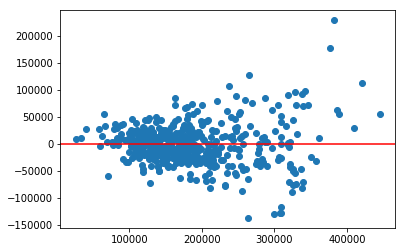

In [131]:
plt.scatter(x = val_preds['val_preds'], y = val_preds['val_errors'])
plt.axhline(0, color='red')

In [ ]:
test= pd.read_csv('datasets/test.csv')


In [ ]:
test.columns=map(str.lower, test.columns)
test.columns = test.columns.str.strip().str.replace(" ","_")

In [97]:
for col in test.columns:
#     if col is object
    if test[col].dtypes == object:
        test[col].fillna('NA', inplace=True)
#     elif col is float or int
    if test[col].dtypes == int or test[col].dtypes == float:
        test[col].fillna(0, inplace=True)

test.isnull().sum().sort_values(ascending=False)

garage_comb             0
heating_qc              0
foundation              0
bsmt_qual               0
bsmt_cond               0
bsmt_exposure           0
bsmtfin_type_1          0
bsmtfin_sf_1            0
bsmtfin_type_2          0
bsmtfin_sf_2            0
bsmt_unf_sf             0
total_bsmt_sf           0
heating                 0
1st_flr_sf              0
exter_qual              0
2nd_flr_sf              0
low_qual_fin_sf         0
gr_liv_area             0
bsmt_full_bath          0
bsmt_half_bath          0
full_bath               0
half_bath               0
bedroom_abvgr           0
kitchen_abvgr           0
kitchen_qual            0
totrms_abvgrd           0
exter_cond              0
mas_vnr_area            0
fireplaces              0
land_slope              0
pid                     0
ms_subclass             0
ms_zoning               0
lot_frontage            0
lot_area                0
street                  0
alley                   0
lot_shape               0
land_contour

In [ ]:
test.head()

In [ ]:
#two types of street: gravel and paved, will replace with 1 and 0 to avoid creating more dummy columns 
street_cleaned = { "Grvl" : 0,
                   "Pave" : 1}
test["street"] = test[["street"]].replace(street_cleaned)

In [ ]:
ms_ven_type_cld = {
                   "None" : 0, 
                   "BrkCmn": 1, 
                   "BrkFace": 2, 
                   "Stone": 3 }
test["mas_vnr_type"] = test[["mas_vnr_type"]].replace(ms_ven_type_cld)

In [ ]:
land_contour_cleaned = { "Bnk" : 0, 
                          "Lvl" : 1, 
                          "Low" : 2, 
                          "HLS" : 3} 
test['land_contour'] = test[['land_contour']].replace(land_contour_cleaned)


In [ ]:
heating_qc_cleaned = {
                 "Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
test['heating_qc'] = test[['heating_qc']].replace(heating_qc_cleaned)


In [ ]:
kitchen_qc_cleaned = {"Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
test['kitchen_qual'] = test[['kitchen_qual']].replace(kitchen_qc_cleaned)

In [ ]:
test = pd.get_dummies(test, columns = ['neighborhood'], drop_first=True)

In [ ]:
test = pd.get_dummies(test, columns = ['central_air'], drop_first=True)
test = pd.get_dummies(test, columns = ['electrical'], drop_first = True)

In [ ]:
test["garage_comb"] = test["garage_area"] * test["garage_cars"]

In [94]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_NA,electrical_SBrkr,neighborhood_GrnHill,electrical_Mix,neighborhood_Landmrk,garage_comb
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,1,AllPub,Inside,Gtl,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,0,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,3,908,1020,0,1928,0,0,2,0,4,2,1,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,440
1,2718,905108090,90,RL,0.0,9662,1,NA,IR1,1,AllPub,Inside,Gtl,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,0,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,2,1967,0,0,1967,0,0,2,0,6,2,2,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1160
2,2414,528218130,60,RL,58.0,17104,1,NA,IR1,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,0,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,4,664,832,0,1496,1,0,2,1,3,1,3,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,852
3,1989,902207150,30,RM,60.0,8520,1,NA,Reg,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,0,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,2,968,0,0,968,0,0,1,0,2,1,2,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,960
4,625,535105100,20,RL,0.0,9500,1,NA,IR1,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,2,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,3,1394,0,0,1394,1,0,1,1,3,1,2,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1028


In [95]:
test['neighborhood_GrnHill'] = 0 
test['electrical_Mix'] = 0 
test['neighborhood_Landmrk'] = 0 

In [133]:
test_preds = pd.DataFrame(lr.predict(test[features]))

In [134]:
test_preds

,0
0,128839.457348
1,176204.214011
2,187254.230444
3,131152.760832
4,181192.096550
...,...
874,166292.766391
875,175156.883288
876,130256.893975
877,116098.805542


In [240]:
test['preds_1'] = test_preds

submission_4 = test.loc[:, ['id', 'preds_1']]
submission_4.head()

,id,preds_1
0,2658,135537.913246
1,2718,179354.280854
2,2414,199595.910019
3,1989,93606.047719
4,625,161630.826671


In [241]:
submission_4.rename(columns = {'id': 'Id', 'preds_1': 'SalePrice'}, inplace=True)

In [242]:
submission_4

,Id,SalePrice
0,2658,135537.913246
1,2718,179354.280854
2,2414,199595.910019
3,1989,93606.047719
4,625,161630.826671
...,...,...
874,1662,187095.386160
875,1234,209765.416879
876,1373,137997.924285
877,1672,103065.713299


In [243]:
submission_4.to_csv('./Submissions/submissions_4', index=False )